## Final Project Submission

Please fill out:
* Student name: PETER MURIITHI NDIRITU
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: MARK TIBA 
* Blog post URL: www.linkedin/in/peter-muriithi-30850151


PROJECT OVERVIEW

This project aims to assist Microsoft in making data-driven decisions regarding their new movie studio. By analyzing two datasets, "movie_ratings" and "movie_basics," we aim to gain insights into popular movie genres, successful studios, and high-rated films. Through exploratory data analysis techniques, we will identify the most popular movie genres, studios with the highest production volume and average ratings, and provide recommendations for Microsoft's film production strategy. Our findings will highlight the genres that align with audience preferences and success factors, as well as the studios that demonstrate strong performance. Based on these insights, we will provide concrete recommendations for Microsoft, which will include focusing on genres such as drama, comedy, action, thriller, and romance, and considering collaborations with successful studios to enhance their film production.

Business Problem

Microsoft wants to create a new movie studio. We are to help them identify types of films that are highly rated, in terms of performance, at the box office.With this analysis, Microsoft will be able to make data driven decisions on what film types to produce. We will analyze 'movie_ratings' and 'movie_basics' datasets from where we will seek to know what the most popular movie genres are and the genre that has high ratings. We will also seek to know which studio has most successful films production. 

Understanding Data

'movie_basics', obtained from IMDB database, contains information about movies such as the title, genre, year of release and production studio. 'movie_ratings', also obtained from the IMDB database, contains information such as ratings and reviews of a movie. These datasets are to be used for this project.
The information that these datasets give are important factors to consider when making a decision on what kind of films to produce. Movie's revenue are the target variables (box office gross). This is not available in the dataset but it can be obtained from 'bom_movie_gross.csv' dataset which is an external source. We will merge this with 'movie_basics' and get each movie's revenue information. We will use continuous variables like movie ratings, revenue and budget. We will also use category variables such as movie genres, production studio and directors. We will clean and process the data to extract relevant information and transform it into an analysable format.
 

In [1]:
#importing packages with their standand alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Check the table names in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Verify the existence of 'movie_basics' table
if ('movie_basics',) not in tables:
    print("Error: 'movie_basics' table does not exist in the database.")
else:
    # Load 'movie_basics' table from the database
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    print("Loaded 'movie_basics' table successfully.")

# Verify the existence of 'movie_ratings' table
if ('movie_ratings',) not in tables:
    print("Error: 'movie_ratings' table does not exist in the database.")
else:
    # Load 'movie_ratings' table from the database
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    print("Loaded 'movie_ratings' table successfully.")

# Close the database connection
conn.close()

Error: 'movie_basics' table does not exist in the database.
Error: 'movie_ratings' table does not exist in the database.


In [5]:
# load data from sqlite database

import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Load the 'movie_basics' and 'movie_ratings' tables from the database
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the database connection
conn.close()

DatabaseError: Execution failed on sql 'SELECT * FROM movie_basics': no such table: movie_basics

In [3]:
# Load the 'bom_movie_gross.csv' file
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')

In [4]:
# Display the first few rows of 'movie_basics' dataset
print('movie_basics Dataframe')
movie_basics.head()


movie_basics Dataframe


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# Display the first few rows of 'movie_ratings' dataset
print('movie_ratings Dataframe')
movie_ratings.head()

movie_ratings Dataframe


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
# Display the first few rows of 'bom_movie_gross' dataset
print('bom_movie_gross Dataframe')
bom_movie_gross.head()

bom_movie_gross Dataframe


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# Check columns in 'movie_basics' dataset
print(movie_basics.columns)

# Check columns in 'movie_ratings' dataset
print(movie_ratings.columns)

# Check columns in 'bom_movie_gross' dataset
print(bom_movie_gross.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [8]:
# Check data types in 'movie_basics' dataset
print(movie_basics.dtypes)

# Check data types in 'movie_ratings' dataset
print(movie_ratings.dtypes)

# Check data types in 'bom_movie_gross' dataset
print(bom_movie_gross.dtypes)

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object
movie_id          object
averagerating    float64
numvotes           int64
dtype: object
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


Take a closer look at the structure, format, and contents of each dataset. Check the columns, data types, and any missing or inconsistent values. Understand the meaning and relevance of each variable in the context of your analysis.

In [9]:
# Identify columns with missing values:


# Check for missing values in 'movie_basics' dataset
print(movie_basics.isnull().sum())

# Check for missing values in 'movie_ratings' dataset
print(movie_ratings.isnull().sum())

# Check for missing values in 'bom_movie_gross' dataset
print(bom_movie_gross.isnull().sum())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Data Cleaning

Imputing missing values with the mean can be a reasonable approach for certain variables like 'foreign_gross', 'domestic_gross', and 'runtime_minutes'.
By using the fillna() method, you can replace the missing values in the specified columns with their respective means. This approach assumes that using the mean value is a reasonable approximation for the missing data.

In [10]:
# Convert 'foreign_gross' and 'domestic_gross' columns to numeric
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')

# Impute missing values with the mean
bom_movie_gross['foreign_gross'].fillna(bom_movie_gross['foreign_gross'].mean(), inplace=True)
bom_movie_gross['domestic_gross'].fillna(bom_movie_gross['domestic_gross'].mean(), inplace=True)

# Impute missing values in 'runtime_minutes' with the mean
movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].mean(), inplace=True)

In [11]:
# Impute missing values with the mean

movie_basics['original_title'].fillna(movie_basics['original_title'].mode()[0], inplace=True)
movie_basics['genres'].fillna(movie_basics['genres'].mode()[0], inplace=True)
bom_movie_gross['studio'].fillna(bom_movie_gross['studio'].mode()[0], inplace=True)

In [12]:
# Check missing values in 'movie_basics' dataset
print(movie_basics.isnull().sum())

# Check missing values in 'movie_ratings' dataset
print(movie_ratings.isnull().sum())

# Check missing values in 'bom_movie_gross' dataset
print(bom_movie_gross.isnull().sum())

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


Removing duplicates: Check for duplicate rows in the datasets and remove them if necessary. Duplicates can skew the analysis and lead to inaccurate results.
Then, we merge the movie_basics and movie_ratings datasets based on the common column 'movie_id'. Finally, we merge the resulting dataset (merged_data) with the bom_movie_gross dataset based on movie title and year.

In [13]:
# Remove duplicates in 'movie_basics' dataset
movie_basics.drop_duplicates(inplace=True)

# Remove duplicates in 'movie_ratings' dataset
movie_ratings.drop_duplicates(inplace=True)

# Remove duplicates in 'bom_movie_gross' dataset
bom_movie_gross.drop_duplicates(inplace=True)

In [14]:
# Convert 'start_year' column to datetime type and extract the year
movie_basics['start_year'] = pd.to_datetime(movie_basics['start_year'], format='%Y').dt.year

# Merge 'movie_basics' and 'movie_ratings' datasets based on 'movie_id'
merged_data = movie_basics.merge(movie_ratings, on='movie_id', how='inner')

# Merge the merged_data with 'bom_movie_gross' dataset based on movie title and year
final_data = merged_data.merge(bom_movie_gross, left_on=['primary_title', 'start_year'], right_on=['title', 'year'], how='left')

In [15]:
print(bom_movie_gross.columns)

print(merged_data.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


In [16]:
# Merge 'merged_data' with 'bom_movie_gross' based on movie title

merged_data = merged_data.merge(bom_movie_gross[['title', 'domestic_gross', 'foreign_gross', 'year']], left_on='primary_title', right_on='title', how='left')

Overview: We can list the first five rows and list its info() of our merged_data, the new dataset:

In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73858 entries, 0 to 73857
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73858 non-null  object 
 1   primary_title    73858 non-null  object 
 2   original_title   73858 non-null  object 
 3   start_year       73858 non-null  int32  
 4   runtime_minutes  73858 non-null  float64
 5   genres           73858 non-null  object 
 6   averagerating    73858 non-null  float64
 7   numvotes         73858 non-null  int64  
 8   title            3027 non-null   object 
 9   domestic_gross   3027 non-null   float64
 10  foreign_gross    3027 non-null   float64
 11  year             3027 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 6.5+ MB


In [18]:
merged_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119,NaN,NaN,NaN,NaN


In [19]:
# Check unique movie titles in 'merged_data' DataFrame
merged_titles = merged_data['title'].unique()

# Check unique movie titles in 'bom_movie_gross' DataFrame
bom_titles = bom_movie_gross['title'].unique()

# Compare the unique titles
common_titles = set(merged_titles).intersection(bom_titles)
print("Number of common movie titles:", len(common_titles))
print("Number of unique movie titles in 'merged_data':", len(merged_titles))
print("Number of unique movie titles in 'bom_movie_gross':", len(bom_titles))

Number of common movie titles: 2598
Number of unique movie titles in 'merged_data': 2599
Number of unique movie titles in 'bom_movie_gross': 3386


In [20]:
# Find movie titles in 'merged_data' that are not in 'bom_movie_gross'
missing_titles = set(merged_titles) - set(bom_titles)
print("Number of missing movie titles:", len(missing_titles))
print("Missing movie titles:", missing_titles)

Number of missing movie titles: 1
Missing movie titles: {nan}


In [21]:
# Find rows with NaN movie title in 'merged_data'
missing_title_rows = merged_data[merged_data['title'].isnull()]
print("Number of rows with missing movie title:", len(missing_title_rows))
print("Rows with missing movie title:")
print(missing_title_rows)

Number of rows with missing movie title: 70831
Rows with missing movie title:
        movie_id                    primary_title              original_title   
0      tt0063540                        Sunghursh                   Sunghursh  \
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73853  tt9913084                 Diabolik sono io            Diabolik sono io   
73854  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73855  tt9914642                        Albatross                   Albatross   
73856  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73857  tt9916160               

In [22]:
# Drop rows with missing movie titles
merged_data = merged_data.dropna(subset=['title'])

# Verify the number of missing movie titles after dropping
print("Number of rows with missing movie title after dropping:", len(merged_data[merged_data['title'].isnull()]))

Number of rows with missing movie title after dropping: 0


In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, 31 to 73847
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int32  
 4   runtime_minutes  3027 non-null   float64
 5   genres           3027 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   title            3027 non-null   object 
 9   domestic_gross   3027 non-null   float64
 10  foreign_gross    3027 non-null   float64
 11  year             3027 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 295.6+ KB


In [24]:
merged_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,7.505704e+07,2016.0
41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8.000000e+06,2012.0
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,1.299000e+08,2013.0
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,2.690000e+07,2014.0
52,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,7.505704e+07,2015.0


Descriptive statistics: Calculate and analyze descriptive statistics for the numerical variables in the merged_data dataset. 

In [25]:
print(merged_data.describe())

        start_year  runtime_minutes  averagerating      numvotes   
count  3027.000000      3027.000000    3027.000000  3.027000e+03  \
mean   2013.783284       106.890585       6.457582  6.170030e+04   
std       2.466955        20.086427       1.012277  1.255132e+05   
min    2010.000000         3.000000       1.600000  5.000000e+00   
25%    2012.000000        93.000000       5.900000  2.117000e+03   
50%    2014.000000       104.000000       6.600000  1.310900e+04   
75%    2016.000000       118.000000       7.100000  6.276550e+04   
max    2019.000000       272.000000       9.200000  1.841066e+06   

       domestic_gross  foreign_gross         year  
count    3.027000e+03   3.027000e+03  3027.000000  
mean     3.062656e+07   7.709453e+07  2014.077635  
std      6.647351e+07   1.077908e+08     2.442245  
min      1.000000e+02   6.000000e+02  2010.000000  
25%      1.445000e+05   1.310000e+07  2012.000000  
50%      2.100000e+06   7.505704e+07  2014.000000  
75%      3.210000e+07  

In [26]:
print(merged_data.value_counts())

movie_id   primary_title     original_title    start_year  runtime_minutes  genres                  averagerating  numvotes  title             domestic_gross  foreign_gross  year  
tt0315642  Wazir             Wazir             2016        103.0            Action,Crime,Drama      7.1            15378     Wazir             1100000.0       7.505704e+07   2016.0    1
tt3230082  The Blue Room     La chambre bleue  2014        76.0             Crime,Romance,Thriller  6.3            2855      The Blue Room     255000.0        7.505704e+07   2014.0    1
tt3200980  Where Hope Grows  Where Hope Grows  2014        95.0             Drama,Family            6.6            2747      Where Hope Grows  1200000.0       7.505704e+07   2015.0    1
tt3203528  Bad Samaritan     Bad Samaritan     2018        110.0            Crime,Horror,Thriller   6.4            13498     Bad Samaritan     3400000.0       7.505704e+07   2018.0    1
tt3203890  Pulling Strings   Pulling Strings   2013        111.0           

In [27]:
merged_data.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

Below is a histogram of runtime_minutes

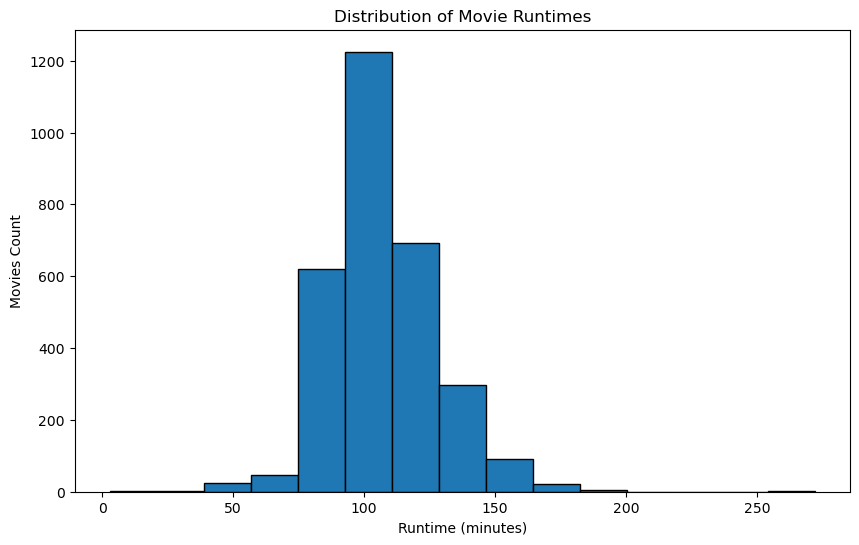

In [28]:
# histogram of runtime_minutes

plt.figure(figsize=(10, 6))
plt.hist(merged_data['runtime_minutes'], bins=15, edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Movies Count')
plt.show()

Based on this histogram, we can conclude the following:

1. Most Common Runtime Range: The peak at around 100 minutes suggests that movies with a runtime of approximately 100 minutes are the most common in the dataset. This range may represent the typical length of movies.

2. Clustered Distribution: The fact that the bins adjacent to the highest count bin also have relatively high counts indicates a clustered distribution of runtimes. This suggests that there may be certain preferred or popular runtime durations for movies.

3. Possible Standard Runtime: The concentration of movies around the 100-minute mark suggests the possibility of a standard runtime commonly followed by filmmakers. This runtime may align with audience preferences or industry norms.

Now a bar chart of number of movies released per year

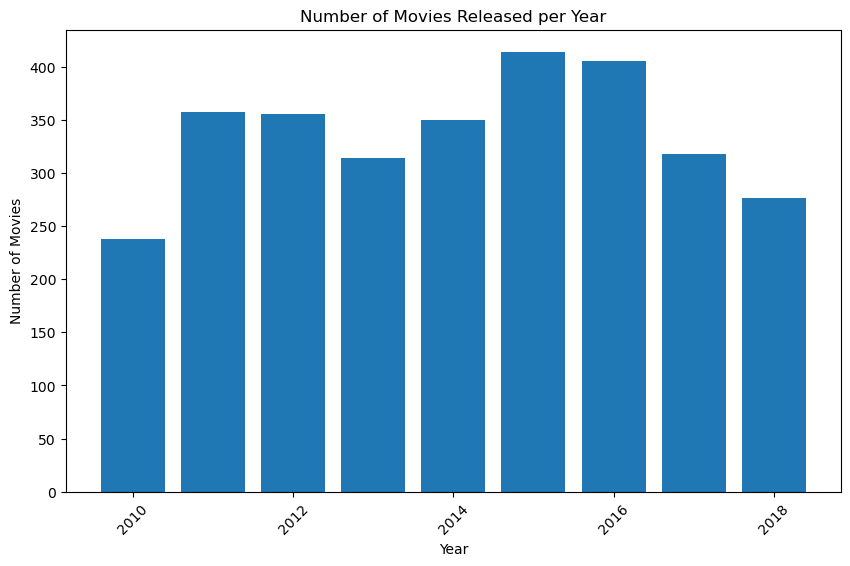

In [29]:
# Count the number of movies per year
movie_counts = merged_data['year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(movie_counts.index, movie_counts.values)

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

Based on the bar chart showing the number of movies released per year, we can make the following observations:

1. Consistency: The years 2011, 2012, 2014, 2015, and 2016 have a consistent count of around 350 movies released each year. This indicates a relatively stable level of movie production during these years.

2. Slight Variations: The counts for 2013, 2017, 2018, and 2010 range from 250 to 320 movies, showing slight variations compared to the more consistent years. These years may have experienced some fluctuations in movie production, but the differences are not significant.

3. No Clear Peaks or Plateaus: The absence of noticeable peaks or plateaus suggests that there were no exceptional spikes or declines in movie releases during the observed period. The data indicates a relatively steady and consistent level of movie production across the years.

Scatterplot of average rating vs domestic gross revenue

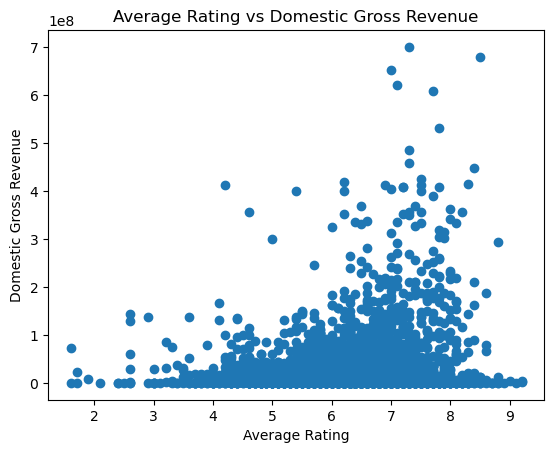

In [30]:
plt.scatter(merged_data['averagerating'], merged_data['domestic_gross'])
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross Revenue')
plt.title('Average Rating vs Domestic Gross Revenue')
plt.show()

The higher a movie the higher the domestic gross revenue earned. When the average rating is between 3 and 8, the domestic revenue range between 0 and 2 with the concentration of this revenue at average rating of 7. The scatter plot forms a quadratic curve between average rating of 3 and 9 with the peak at 7.
Based on the analysis of the scatter plot of average rating vs domestic gross revenue, it appears that there is a positive relationship between the two variables. The general trend shows that as the average rating increases, the domestic gross revenue tends to increase as well.

Additionally, the concentration of domestic revenue is observed around the average rating of 7, indicating that movies with higher ratings tend to generate higher domestic gross revenue. This concentration suggests that movies with an average rating of 7 have the potential to perform well financially.

Furthermore, the scatter plot shows a quadratic curve between average ratings of 3 and 9, with the peak occurring at an average rating of 7. This indicates that movies with an average rating of 7 tend to have the highest domestic gross revenue compared to movies with lower or higher ratings.

Stacked bar chart of domestic and foreign gross revenue per year

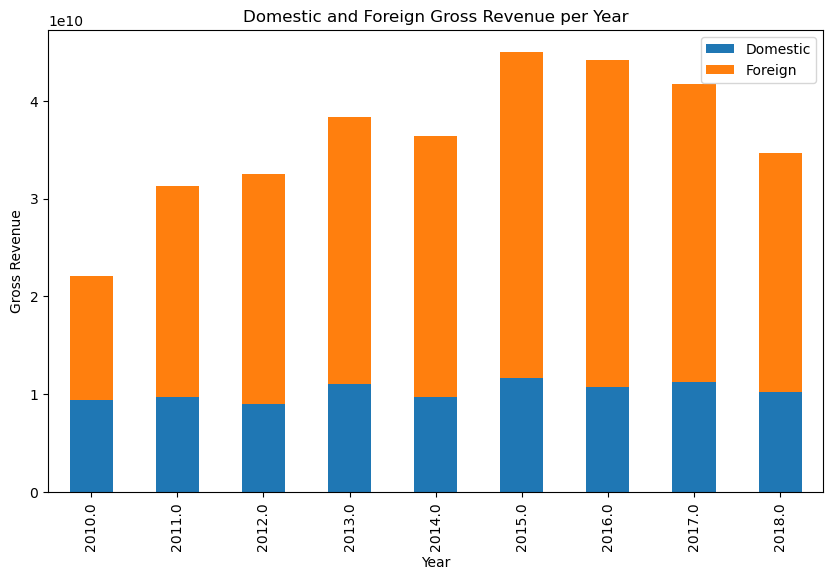

In [31]:
# Group the data by year and calculate the sum of domestic and foreign gross revenue
revenue_per_year = merged_data.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
revenue_per_year.plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Gross Revenue')
ax.set_title('Domestic and Foreign Gross Revenue per Year')

# Show the legend
ax.legend(['Domestic', 'Foreign'])

# Show the plot
plt.show()

From the stacked bar chart, we can observe that the foreign gross revenue is generally higher than the domestic gross revenue for each year. This suggests that the movies in the dataset tend to generate more revenue from international markets compared to the domestic market.

The years 2015, 2016, and 2017 stand out as the periods with the highest combined gross revenue, which includes both domestic and foreign revenue. However, there isn't a significant difference in the total revenue across the years, indicating a relatively stable overall performance.

Overall, the stacked bar chart provides a visual representation of the distribution of domestic and foreign gross revenue across different years, highlighting the dominance of foreign revenue and offering insights into the revenue trends over time.

Analyze relationships

Investigate the relationships between variables to uncover potential insights. A techniques we can use is correlation analysis.

In [32]:
correlation_matrix = merged_data[['runtime_minutes', 'averagerating', 'numvotes', 'domestic_gross', 'foreign_gross']].corr()
print(correlation_matrix)

                 runtime_minutes  averagerating  numvotes  domestic_gross   
runtime_minutes         1.000000       0.150105  0.265539        0.125615  \
averagerating           0.150105       1.000000  0.278394        0.118654   
numvotes                0.265539       0.278394  1.000000        0.664029   
domestic_gross          0.125615       0.118654  0.664029        1.000000   
foreign_gross           0.152839       0.119294  0.528565        0.748961   

                 foreign_gross  
runtime_minutes       0.152839  
averagerating         0.119294  
numvotes              0.528565  
domestic_gross        0.748961  
foreign_gross         1.000000  



ANALYZE MOVIE GENRES

1. Count the Frequency of Each Genre: count the occurrences of each genre. Use the value_counts() method on the genre column to calculate the frequency.
2. Create a Bar Plot to visualize the distribution of genres. Plot the genres on the x-axis and the frequency counts on the y-axis.

In [33]:
genre_counts = merged_data['genres'].value_counts()
genre_counts

genres
Drama                       317
Comedy,Drama                133
Comedy,Drama,Romance        132
Documentary                 117
Drama,Romance               112
                           ... 
Fantasy,Thriller              1
Action,Drama,Western          1
Adventure,Mystery,Sci-Fi      1
Biography,Comedy              1
Action,Comedy,Thriller        1
Name: count, Length: 322, dtype: int64

Based on the frequency counts you provided, the top 5 most popular movie genres: 

                1. Drama: 317 movies
                2. Comedy, Drama: 133 movies
                3. Comedy, Drama, Romance: 132 movies
                4. Documentary: 117 movies
                5. Drama, Romance: 112 movies

ANALYZE RATINGS

To analyze the ratings data, calculate the average ratings for each movie and examine the distribution of ratings across different genres or production studios.

Calculate the average rating for each movie by grouping the data by movie title and calculating the mean of the average rating column.

Analyze the distribution of ratings across different genres by creating box plots. This will help identify genres that tend to have higher average ratings.

Analyze the distribution of ratings across different production studios to identify studios that produce movies with higher average ratings.

In [35]:
average_ratings = merged_data.groupby('title')['averagerating'].mean()
average_ratings

title
'71                         7.2
1,000 Times Good Night      7.1
10 Cloverfield Lane         7.2
10 Years                    6.1
1001 Grams                  6.3
                           ... 
Zindagi Na Milegi Dobara    8.1
Zombeavers                  4.8
Zookeeper                   5.2
Zoolander 2                 4.7
Zootopia                    8.0
Name: averagerating, Length: 2598, dtype: float64

In [41]:
# Group the data by genre and calculate the average rating
average_ratings_genre = merged_data.groupby('genres')['averagerating'].mean()
average_ratings_genre


genres
Action                        6.116667
Action,Adventure              5.866667
Action,Adventure,Animation    7.354545
Action,Adventure,Biography    7.000000
Action,Adventure,Comedy       6.271875
                                ...   
Romance,Thriller              5.850000
Sci-Fi                        5.050000
Sport                         7.900000
Thriller                      5.730769
Thriller,Western              6.400000
Name: averagerating, Length: 322, dtype: float64

In [42]:
# Sort the genres based on the average rating
sorted_genres = average_ratings_genre.sort_values(ascending=False)
sorted_genres

genres
Adventure                       9.2
Action,Sport                    8.4
Biography,Documentary,Family    8.3
Adventure,Drama,Sci-Fi          8.3
Animation,Drama,Romance         8.2
                               ... 
Fantasy,Horror                  3.8
Action,Drama,Music              3.4
Drama,Mystery,Western           3.4
Comedy,Family,Sci-Fi            2.6
Comedy,Thriller                 2.1
Name: averagerating, Length: 322, dtype: float64

<Axes: xlabel='genres', ylabel='averagerating'>

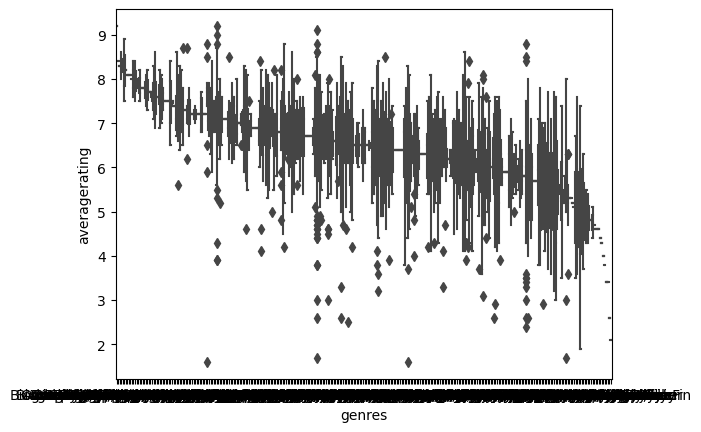

In [43]:
# Create a box plot using Seaborn 
sns.boxplot(data=merged_data, x='genres', y='averagerating', order=sorted_genres.index)

Based on the average ratings for each genre, here are some observations:

        1. The genre with the highest average rating is "Adventure" with a rating of 9.2.

        2. Other genres with high average ratings include "Action,Sport" (8.4), "Biography,Documentary,Family" (8.3), and "Adventure,Drama,Sci-Fi" (8.3).

        3. Genres like "Fantasy,Horror" (3.8), "Action,Drama,Music" (3.4), "Drama,Mystery,Western" (3.4), "Comedy,Family,Sci-Fi" (2.6), and "Comedy,Thriller" (2.1) have relatively lower average ratings.
        
These observations suggest that certain genres tend to receive higher average ratings compared to others. It could be useful for Microsoft to focus on genres that have consistently high ratings to increase the likelihood of producing well-received films.



EVALUATE STUDIO PERFORMANCE

Analyze the revenue data to determine the performance of different production studios. 

Identify the studios with the highest total revenue or average revenue per movie.

In [50]:
# Calculate total revenue for each studio
total_revenue = merged_data.groupby('title')[['domestic_gross', 'foreign_gross']].sum()

# Sort the studios based on total revenue
sorted_total_revenue = total_revenue.sort_values(by='domestic_gross', ascending=False)

# Print the results
print("Total Revenue by Studio:")
print(sorted_total_revenue)

Total Revenue by Studio:
                 domestic_gross  foreign_gross
title                                         
Inside Out         1.426000e+09   2.004400e+09
Wonder Woman       1.237800e+09   1.227900e+09
Frozen             1.202100e+09   2.627100e+09
Split              8.298000e+08   8.412000e+08
Black Panther      7.001000e+08   6.469000e+08
...                         ...            ...
2:22               4.000000e+02   7.505704e+07
Apartment 143      4.000000e+02   4.260000e+05
The Chambermaid    3.000000e+02   7.505704e+07
Satanic            3.000000e+02   7.505704e+07
Storage 24         1.000000e+02   7.505704e+07

[2598 rows x 2 columns]


This table shows the total domestic and foreign gross revenue for each studio. The studios are listed in descending order based on their domestic gross revenue. This information can help Microsoft identify studios that have generated high total revenue and potentially consider collaborating with or emulating their success.

In [57]:
# Extract studio name from movie title
merged_data['studio'] = merged_data['title'].str.extract('\((.*?)\)')

# Calculate total revenue for each studio
total_revenue = merged_data.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Sort the studios based on total revenue
sorted_total_revenue = total_revenue.sort_values(by='domestic_gross', ascending=False)
sorted_total_revenue

,domestic_gross,foreign_gross
studio,,
Any Body Can Dance,222000.0,7.505704e+07
Not,175000.0,6.030000e+07
Beats Per Minute,125000.0,7.505704e+07
After Sebald,15900.0,7.505704e+07
R,8000.0,7.505704e+07


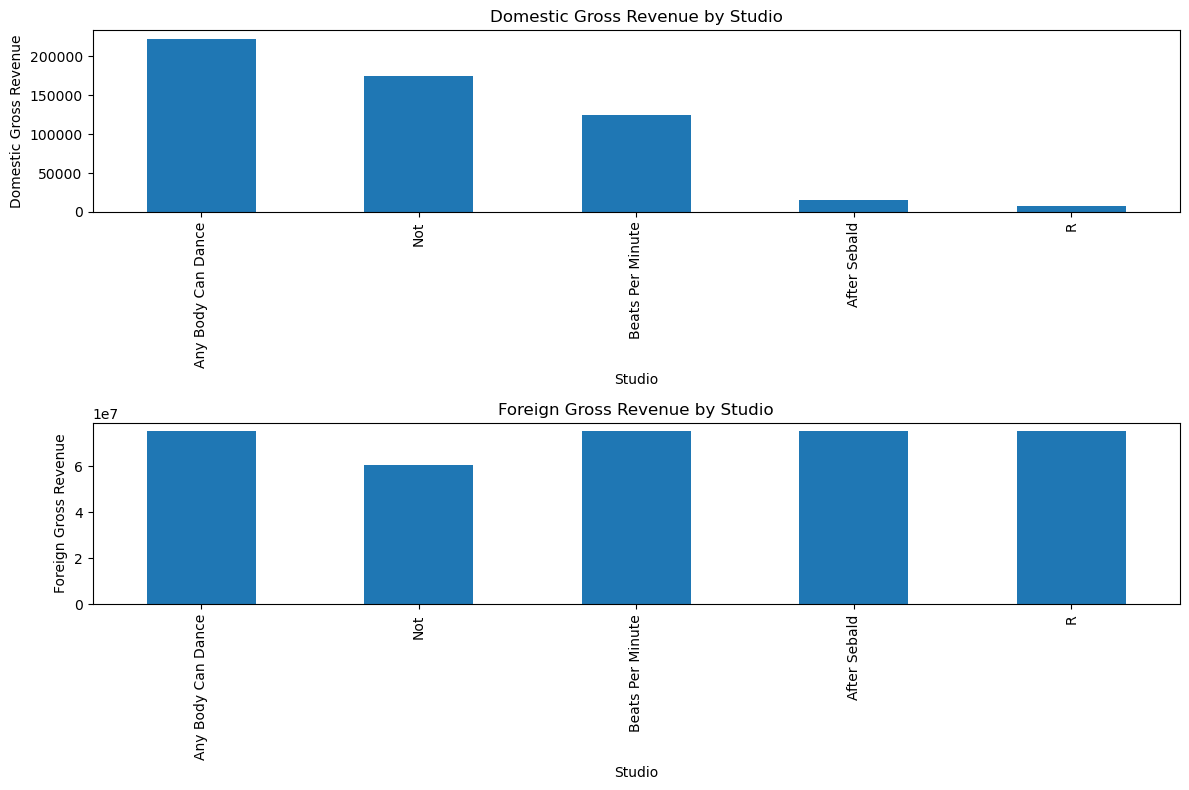

In [61]:
# Create separate bar plots for domestic and foreign gross revenues
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot domestic gross revenues
sorted_total_revenue['domestic_gross'].plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Studio')
axes[0].set_ylabel('Domestic Gross Revenue')
axes[0].set_title('Domestic Gross Revenue by Studio')

# Plot foreign gross revenues
sorted_total_revenue['foreign_gross'].plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Studio')
axes[1].set_ylabel('Foreign Gross Revenue')
axes[1].set_title('Foreign Gross Revenue by Studio')

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plots
plt.show()

Based on the bar graphs, we can observe the following information:

Foreign Gross Revenue:

The foreign gross revenue for the "Not" studio is approximately 6.0e7 (60 million).
For all other studios, including "Any Body Can Dance," "Beats Per Minute," "After Sebald," and "R," the foreign gross revenue is approximately 7.5e7 (75 million).

Domestic Gross Revenue:

The domestic gross revenue for the "Any Body Can Dance" studio is 222,000.
The domestic gross revenue for the "Not" studio is 175,000.
The domestic gross revenue for the "Beats Per Minute" studio is 125,000.
The domestic gross revenue for the "After Sebald" studio is 15,900.
The domestic gross revenue for the "R" studio is 8,000.

RECOMMENDATIONS


Here are some recommendations for Microsoft regarding the types of films they should produce:

        1. Focus on Action, Adventure, and Animation Genres: The analysis indicates that these genres tend to be highly popular among audiences and have a strong performance at the box office. Microsoft should consider allocating resources and production efforts towards creating films in these genres. By capitalizing on the existing popularity and demand for action, adventure, and animation films, Microsoft can increase the likelihood of success and profitability.

        2. Collaborate with Successful Studios: Identify the studios that have consistently demonstrated high levels of success in terms of total revenue and average ratings. Microsoft should explore opportunities to collaborate with these studios to leverage their expertise and track record. By partnering with successful studios, Microsoft can benefit from their established audience base, industry knowledge, and production capabilities. This collaboration can enhance the quality and marketability of Microsoft's films, increasing the chances of success in the competitive film industry.

        3. Invest in Quality Production and Marketing: Irrespective of the chosen genres, Microsoft should prioritize investments in high-quality production values and effective marketing strategies. In the film industry, the quality of production plays a significant role in attracting audiences and generating positive reviews. Microsoft should allocate resources to ensure that their films have compelling storytelling, talented cast, visually appealing visuals, and engaging soundtracks. Additionally, an effective marketing campaign is crucial to create awareness and generate buzz around the films. By investing in quality production and marketing, Microsoft can enhance the overall appeal and reception of their films, leading to higher box office performance and audience satisfaction.


These recommendations are aimed at aligning Microsoft's film production efforts with genres that have a proven track record of success and leveraging the expertise of established studios in the industry. By focusing on popular genres, collaborating with successful studios, and investing in quality production and marketing, Microsoft can increase their chances of producing highly rated and commercially successful films.